<div class='alert alert-block alert-success'><font color="black"><h1 align='center'>Load Saved Model
    </h1></font></div>

In [3]:
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

#enter location of model
vgg_model = load_model(r'C:\Users\xu.meng\Veronica\vgg_model')

### Call Load Data .py to load your new data

In [69]:
# Call the prediction load data function from the respective file
%run -i "C:\Users\xu.meng\Veronica\load_data_movAvg.py"

In [58]:
# Image Folder for Sample images & External Data 
prediction_path_demo = r"C:\Users\xu.meng\Veronica\Prediction"

external_demo = r"C:\Users\xu.meng\Veronica\Prediction\external_data_2.csv"

# Load into variables
image_array_demo, merge_with_labels_demo, df_for_training_demo = load_data_MA(prediction_path_demo, external_demo)

In [59]:
merge_with_labels_demo.head()

,Label,match_date,Zip Code,Date,Mortgage Rate,Percent Delinquent Mortgages,Unemployment,Index Wellness,MA_3Wk,buckets
0,SKYWATCH_3SA_PS_20200507T1825_TC_Tile_0_0_5GLK...,2020-05-03,94103,2020-05-07,0.0326,0.049,0.127,0.62494,0.524,1
1,SKYWATCH_K3A_PS_20191124T2103_TC_Tile_0_0_6KU1...,2019-11-24,94103,2019-11-24,0.0372,0.007,0.020,0.61310,0.660,2


### Predict on New Data

In [60]:
prediction = vgg_model.predict([df_for_training_demo,image_array_demo])

<div class='alert alert-block alert-success'><font color="black"><h1 align='center'>Visualize Results
    </h1></font></div>

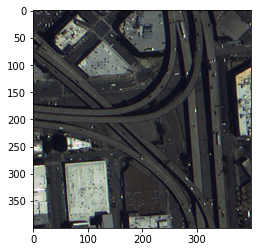

Date: 2020-05-07
Predicted Value: 2
Predicted Percentile: 25th - 50th percentile
Actual Value: 2
Actual Percentile: 25th - 50th percentile


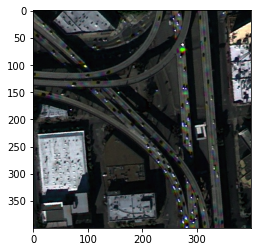

Date: 2019-11-24
Predicted Value: 3
Predicted Percentile: 50th - 75th percentile
Actual Value: 3
Actual Percentile: 50th - 75th percentile


In [61]:
show_predictions(image_array_demo,merge_with_labels_demo,prediction3)

<div class='alert alert-block alert-success'><font color="black"><h1 align='center'>Export to .csv
    </h1></font></div>

In [74]:
output_pred = array_to_df(prediction)
prediction_merge = merge_with_labels_demo.merge(output_pred, left_index = True, right_index = True)
prediction_merge['buckets'] = pd.to_numeric(prediction_merge['buckets']) + 1

In [75]:
prediction_merge.head()

,Label,match_date,Zip Code,Date,Mortgage Rate,Percent Delinquent Mortgages,Unemployment,Index Wellness,MA_3Wk,buckets,predicted_bucket
0,SKYWATCH_3SA_PS_20200507T1825_TC_Tile_0_0_5GLK...,2020-05-03,94103,2020-05-07,0.0326,0.049,0.127,0.62494,0.524,2,2
1,SKYWATCH_K3A_PS_20191124T2103_TC_Tile_0_0_6KU1...,2019-11-24,94103,2019-11-24,0.0372,0.007,0.020,0.61310,0.660,3,3


In [82]:
prediction_merge.to_csv(r'C:\Users\xu.meng\Veronica\Prediction\Predicted_Index.csv', header = True, index = False)